## Map stations

In [112]:
import os
import zipfile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import numpy as np
from pyproj import Proj
from osgeo import gdal

In [113]:
df = pd.read_csv('data/Estaciones_meteorologicas.csv')
df.head()

,fuente,numero,codigo,nombre,tipo,provincia,estado,fecha_instalacion,latitud,longitud,parametros_medicion
0,esta_inamhi,1,M0029,BAÑOS,CP,TUNGURAHUA,FUNCIONANDO,20-jun-62,12329.0,782505.0,"Temperatura Max, temperatura Min, Temperatura,..."
1,esta_inamhi,2,M0258,QUEROCHACA(UTA),CP,TUNGURAHUA,FUNCIONANDO,2-nov-85,12202.0,783620.0,"Temperatura Max, temperatura Min, Temperatura,..."
2,esta_inamhi,3,M1069,CALAMACA CONVENIO INAMHI HCPT,CP,TUNGURAHUA,FUNCIONANDO,4-jul-88,11634.0,784908.0,"Temperatura Max, temperatura Min, Temperatura,..."
3,esta_inamhi,4,M0126,PATATE,CO,TUNGURAHUA,FUNCIONANDO,1-may-63,11801.0,783000.0,"Temperatura Max, temperatura Min, Temperatura,..."
4,esta_inamhi,5,M0127,PILLARO,CO,TUNGURAHUA,FUNCIONANDO,1-Dec-63,11010.0,783310.0,"Temperatura Max, temperatura Min, Temperatura,..."


In [114]:
# Conversion from UTM to degrees
# https://ocefpaf.github.io/python4oceanographers/blog/2013/12/16/utm/
# EPSG:32717 (UTM 17S) (copy Proj4 format)
north = Proj("+proj=utm +zone=17 +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
south = Proj("+proj=utm +zone=17 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
df['lon_deg'] = np.nan 
df['lat_deg'] = np.nan 

In [115]:
# Convert DMS coords to DD
def latDD(x):
    D = int(str(x)[0:1])
    M = int(str(x)[1:3])
    S = int(str(int(x))[3:])
    DD = -(D + float(M)/60 + float(S)/3600)
    return DD
def lonDD(x):
    D = int(str(x)[0:2])
    M = int(str(x)[2:4])
    S = int(str(int(x))[4:])
    DD = -(D + float(M)/60 + float(S)/3600)
    return DD

In [116]:
# UTM info : http://geokov.com/education/utm.aspx
# Northing coordinates use Equator as reference. For NH, Equator= 0. For SH , Equator = 10.000.000
# Easting coordinates use the false origin 500000 meters to the west of the central meridian of the UTM zone

# ESTA INAMHI data had lat = xxxS and long = xxxW 
## 17N
df.loc[df['fuente'] != 'esta_inamhi','lon_deg'], df.loc[df['fuente'] != 'esta_inamhi','lat_deg']= south(df[df['fuente'] != 'esta_inamhi']['longitud'].values, 
                                                df[df['fuente'] != 'esta_inamhi']['latitud'].values, inverse=True)

## 17S
df.loc[df['fuente'] == 'esta_inamhi','lon_deg'] =  [lonDD(x) for x in df[df['fuente'] == 'esta_inamhi']['longitud'].values]
df.loc[df['fuente'] == 'esta_inamhi','lat_deg']= [latDD(x) for x in df[df['fuente'] == 'esta_inamhi']['latitud'].values]
                                                
                               

In [117]:
df['lon_deg'] = df['lon_deg'].replace({float("inf"): np.nan})  
df['lat_deg'] = df['lat_deg'].replace({float("inf"): np.nan})

In [118]:
### use all stations
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['lon_deg'], df['lat_deg']))

In [10]:
### take only selected stations
sel= df[(df.fuente == 'esta_hgpt') & (df.tipo== 'MA')]

In [11]:
gdf = gpd.GeoDataFrame(
    sel, geometry=gpd.points_from_xy(sel['lon_deg'], sel['lat_deg']))

In [119]:
gdf = gdf.set_crs(epsg=4326)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


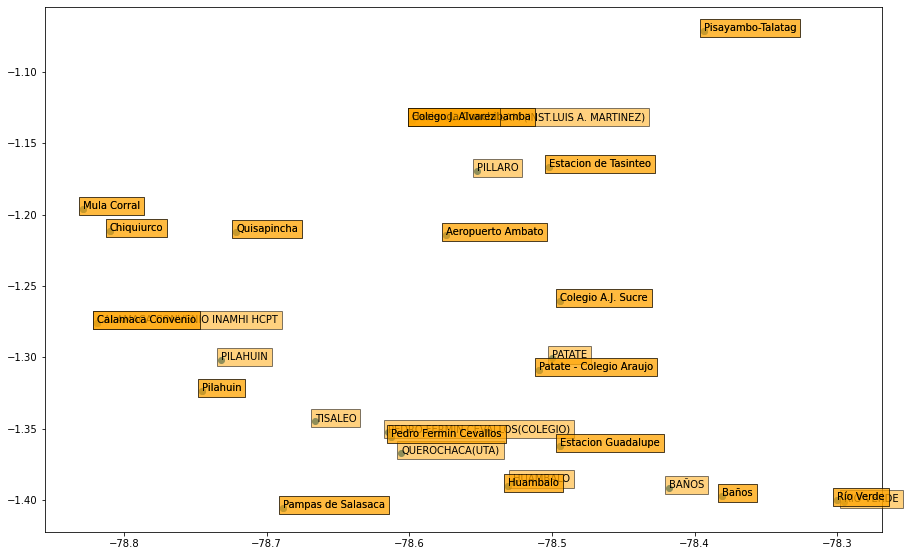

In [120]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
Ec = world.query('name == "Ecuador"')
gdf4326 = gdf.to_crs(world.crs)

fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')
#SA.plot(ax=ax, color='white', edgecolor='black')
#gdf4326.plot(ax=ax, column = 'tipo', legend =True)
gdf4326.plot(ax=ax)
for i in range(gdf4326.shape[0]):
    plt.text(x=gdf4326.lon_deg.values[i],y=gdf4326.lat_deg.values[i],s=gdf4326.nombre.values[i], 
          fontdict=dict(color='black',size=10),
          bbox=dict(facecolor='orange',alpha=0.5))

plt.show()

In [ ]:
### Add contextual data to map
- Volcanoes
- DEM
- provinces
- cities
- Land use
 ### Source : Marc Souris savgis
## http://www.savgis.org/ecuador.htm province, volcanoes, cities
### https://www.diva-gis.org/datadown elevation, land use

In [121]:
### Más capas
### Volcanoes
zipfile ='zip:///Users/tamarahuete/Documents/Github_repos/TFM21/data/Map/volcanes.zip'
vol = gpd.read_file(zipfile)

## Provinces
zipfile ='zip:///Users/tamarahuete/Documents/Github_repos/TFM21/data/Map/provincias.zip'
prov = gpd.read_file(zipfile)

## Cities
zipfile ='zip:///Users/tamarahuete/Documents/Github_repos/TFM21/data/Map/ciudades.zip'
cit = gpd.read_file(zipfile)

In [122]:
prov.head()

,Id,geometry
0,000001,"POLYGON ((-79.46715 -3.32241, -79.44613 -3.330..."
1,000002,"POLYGON ((-77.84424 0.32312, -77.85538 0.35168..."
2,000003,"POLYGON ((-77.84424 0.32312, -77.79921 0.35921..."
3,000004,"POLYGON ((-79.46715 -3.32241, -79.47876 -3.315..."
4,000005,"POLYGON ((-79.63204 0.96300, -79.63185 0.95775..."


In [123]:
tung = prov[prov['Id'] == '000020']
tung = tung.set_crs(epsg=4326)
vol = vol.set_crs(epsg=4326)
cit = cit.set_crs(epsg =4326)

In [124]:
vol_tung = gpd.clip(vol,tung)
cit_tung = gpd.clip(cit, tung)

In [125]:
vol

,Id,geometry
0,Volcán Cayambe,POINT (-77.99007 0.02629)
1,Volcán El Reventador,POINT (-77.65733 -0.08013)
2,Volcán Pan de Azúcar,POINT (-77.62475 -0.36131)
3,Volcán Sumaco,POINT (-77.62612 -0.53737)
4,Cerro Negro,POINT (-77.71874 -0.43354)
5,Volcán Antizana,POINT (-78.14021 -0.48328)
6,Volcán Cotopaxi,POINT (-78.43511 -0.68402)
7,Volcán Rumiñahui,POINT (-78.51591 -0.58944)
8,Volcán Sincholagua,POINT (-78.36590 -0.54095)
9,Volcán Pasochoa,POINT (-78.48584 -0.45554)


<AxesSubplot:>

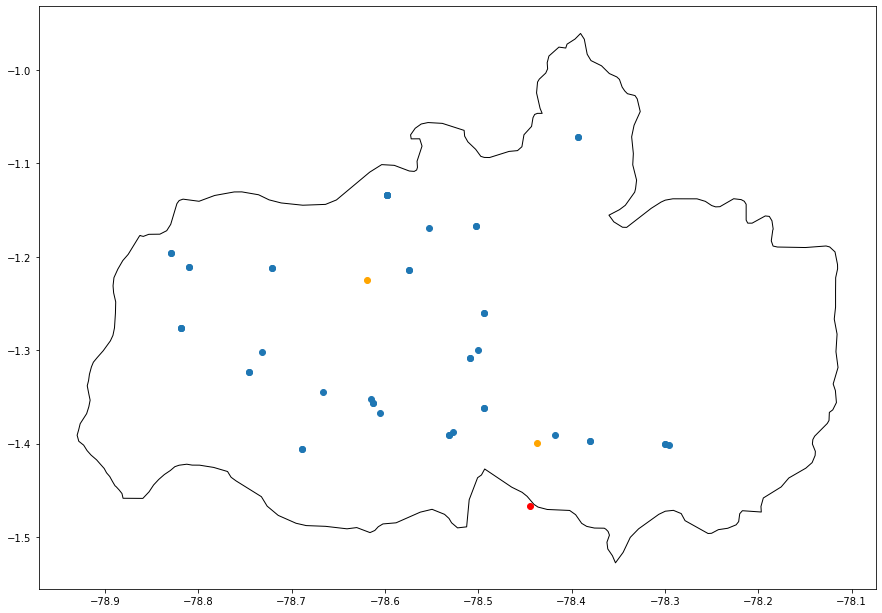

In [126]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')
#Ec.plot(ax=ax, color='white', edgecolor='black')
#prov.plot(ax=ax,color='white', edgecolor='black')
tung.plot(ax=ax, color='white', edgecolor='black', legend=True)
gdf4326.plot(ax=ax)
vol[vol['Id']== 'Volcán Tungurahua'].plot(ax=ax, color ='red')
cit_tung.plot(ax=ax, color = 'orange')

In [ ]:
####DEM data 
#https://www.earthdatascience.org/tutorials/visualize-digital-elevation-model-contours-matplotlib/

In [29]:
import elevation
from osgeo import gdal

In [87]:
!eio clip -o Ecuador-30m-DEM.tif --bounds -78.8 -1.6 -78.2 -0.9

make: Entering directory '/Users/tamarahuete/Library/Caches/elevation/SRTM1'
curl -s -o spool/S02/S02W079.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/S02/S02W079.hgt.gz && mv spool/S02/S02W079.hgt.gz.temp spool/S02/S02W079.hgt.gz
gunzip spool/S02/S02W079.hgt.gz 2>/dev/null || touch spool/S02/S02W079.hgt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/S02/S02W079.hgt cache/S02/S02W079.tif 2>/dev/null || touch cache/S02/S02W079.tif
curl -s -o spool/S01/S01W079.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/S01/S01W079.hgt.gz && mv spool/S01/S01W079.hgt.gz.temp spool/S01/S01W079.hgt.gz
gunzip spool/S01/S01W079.hgt.gz 2>/dev/null || touch spool/S01/S01W079.hgt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/S01/S01W079.hgt cache/S01/S01W079.tif 2>/dev/null || touch cache/S01/S01W079.tif
rm spool/S01/S01W079.hgt spool/S02/S02W079.hgt
make: Leaving directory '/Users/tamarahuet

In [31]:
filename = "Ecuador-30m-DEM.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

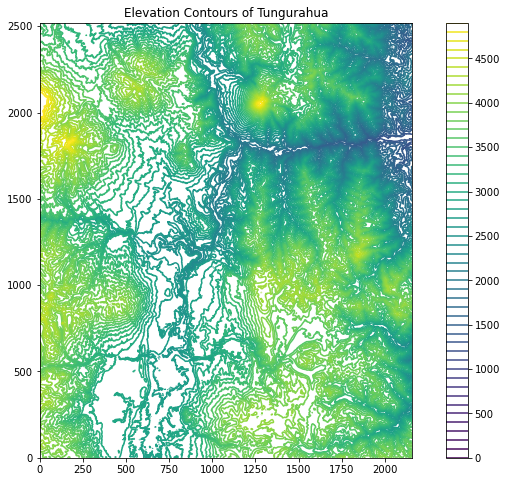

In [33]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours of Tungurahua")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

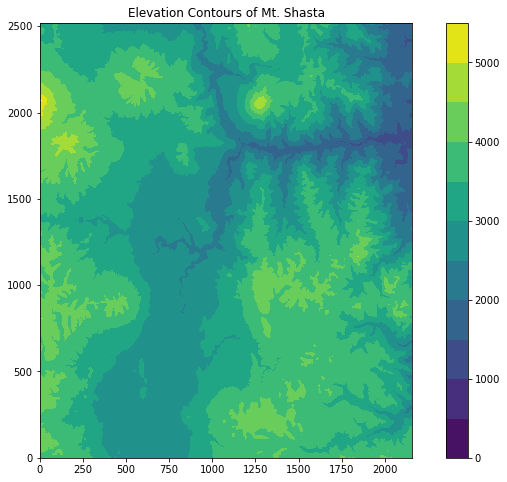

In [35]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 6000, 500)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
### Add BAsemap to geopandas plot
#https://geopandas.org/gallery/plotting_basemap_background.html

In [127]:
import contextily as ctx

In [128]:
df = tung.to_crs(epsg =3857)

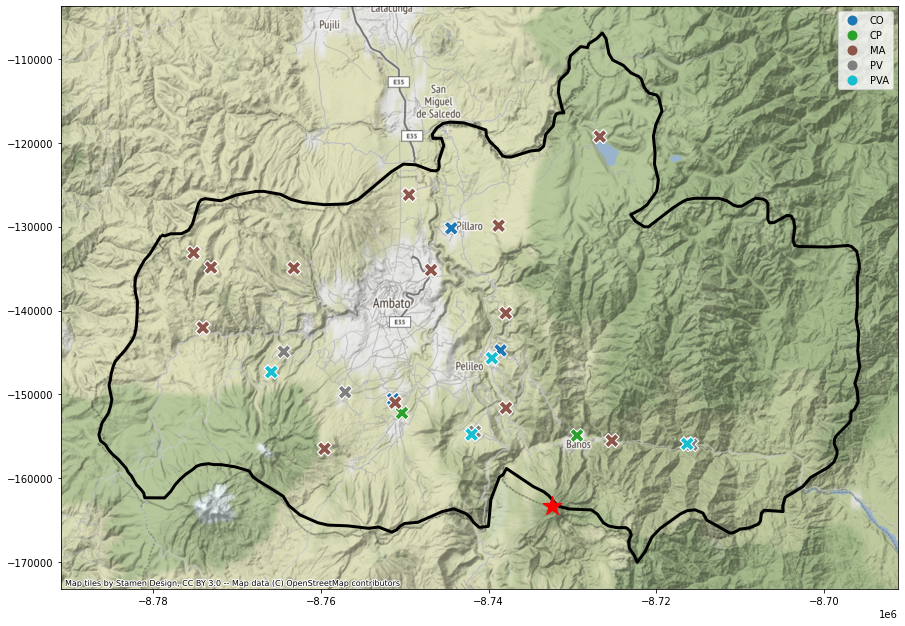

In [136]:
ax = df.plot(figsize=(15, 15), edgecolor='black', color = "none", lw =3)
vol[vol['Id']== 'Volcán Tungurahua'].to_crs(epsg =3857).plot(ax=ax, color ='red', marker = "*", markersize = 400)
# cit_tung.to_crs(epsg =3857).plot(ax=ax, color = 'lightgray', marker = 'o', markersize=200, edgecolors = 'black')
gdf.to_crs(epsg =3857).plot(ax=ax, column = 'tipo', marker="X", markersize = 200, edgecolors = 'white', legend = True) 
gdf3857 = gdf.to_crs(epsg =3857)
# for i in gdf3857.index.values:
#     plt.text(x=gdf3857.geometry.x[i]+1500,y=gdf3857.geometry.y[i],s=gdf3857.nombre[i], 
#           fontdict=dict(color='black',size=10),
#           bbox=dict(facecolor='orange',alpha=0.5))
ctx.add_basemap(ax)